# Problem
Every year, the city of Detroit issues millions of dollars in fines to residents and every year, many of these fines remain unpaid. Enforcing unpaid blight fines is a costly and tedious process, so the city wants to know: how can we increase blight ticket compliance?

The first step in answering this question is understanding when and why a resident might fail to comply with a blight ticket. This is where predictive modeling comes in.

My task is to predict whether a given blight ticket will be paid on time.

## The datasets

  Two data files for use in training and validating the model: train.csv and test.csv. Each row in these two files corresponds to a single blight ticket, and includes information about when, why, and to whom each ticket was issued. The target variable is compliance, which is True if the ticket was paid early, on time, or within one month of the hearing data, False if the ticket was paid after the hearing date or not at all, and Null if the violator was found not responsible. Compliance, as well as a handful of other variables that will not be available at test-time, are only included in train.csv.

# Data Preprocessing

In [2]:
# Import necessary modules

import numpy as np
import pandas as pd

In [5]:
# Load the datasets

train_set = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Workspace/Blight Ticket Predictions/train.csv", encoding='cp1252')
dev_set = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Workspace/Blight Ticket Predictions/test.csv")

<ipython-input-5-0c81ddc9dd58>:3: DtypeWarning: Columns (11,12,31) have mixed types. Specify dtype option on import or set low_memory=False.
  train_set = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Workspace/Blight Ticket Predictions/train.csv", encoding='cp1252')


In [6]:
# I am using to use only 4 features

X = train_set[['ticket_id', 'fine_amount', 'admin_fee', 'state_fee', 'compliance']]

In [7]:
# This code drops all rows that have missing values.

missing_rows = X.T.isnull().any()
X = X.drop(missing_rows[missing_rows].index, axis=0)

X.shape

(159880, 5)

In [8]:
# The target variable is compliance

y = X.pop('compliance')

y.shape

(159880,)

In [10]:
# Set up the dev set

X_dev = dev_set[['ticket_id', 'fine_amount', 'admin_fee', 'state_fee']]

X_dev.shape

(61001, 4)

In [11]:
# Split the training data into: train and test sets.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Training

In [12]:
# Using a KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

# Evaluation

In [13]:
# Training set performance

model.score(X_train, y_train)

0.9319322825452423

In [14]:
# Test set performance

model.score(X_test, y_test)

0.9219664748561421

In [15]:
# Dev set predictions

y_dev_predictions = model.predict(X_dev)


# How many positive predictions did my model made for the dev set?

(pd.Series(y_dev_predictions, index=X_dev.ticket_id) == 1).sum()

175

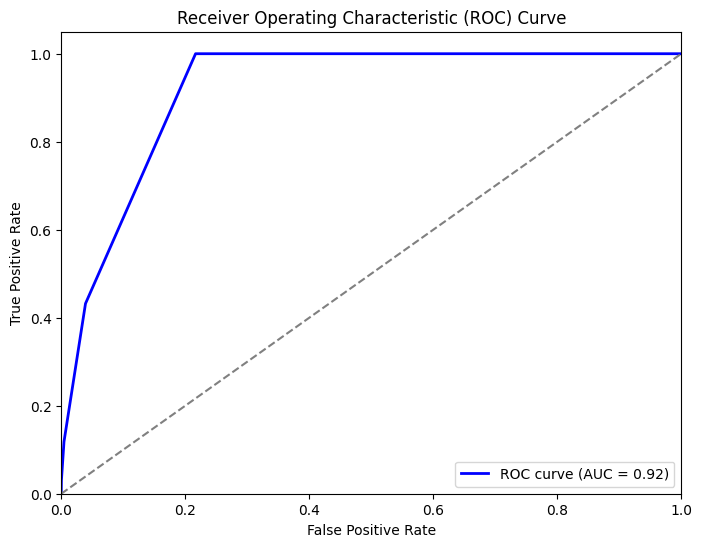

In [16]:
# Using ROC to evaluate the performance

from sklearn.metrics import roc_curve, roc_auc_score, auc

y_train_p = model.predict_proba(X_train)[:, 1]
fpr, tpr, t = roc_curve(y_train, y_train_p)
roc_auc = roc_auc_score(y_train, y_train_p)


import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()